<a href="https://colab.research.google.com/github/022000672-Luc/upsrj-keras/blob/main/LNN_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#red convulocional con keras para deteccion de perros
##Objetivo

Implemetar una red neuronal convolucional que nos permita procesar imagenes para detectar o que clase pertenecen, especificamente , necesitamos aprender a diferenciar entre perros y gatos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass



1. **Cargar y preparar los datos**

Usaremos el dataset de ejemplo de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), EL CUAL INCLUYE 6000 imagenes a color de 32x32 en 10 clases, con 6000 imagenes por clase.  

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


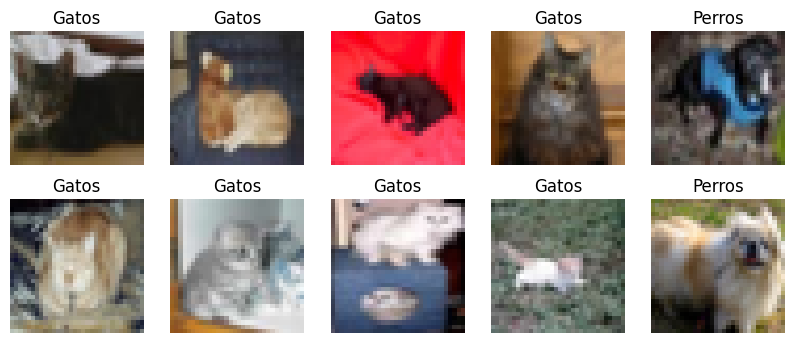

In [2]:
# cargamos base de datos de imagenes y dividimos en train data & test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# estructura de datos
@dataclass
class gatos:
  id: int = 3
  label: str = "Gatos"

@dataclass
class perros:
  id: int = 5
  label: str = "Perros"

deseado = perros
no_deseado = gatos

# clases: 3 = gato, 5 = perro
mask_train = (y_train.flatten() == gatos.id) | (y_train.flatten() == perros.id)
mask_test = (y_test.flatten() == gatos.id) | (y_test.flatten() == perros.id)

# filtramos de la base de datos las clases deseadas
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalización (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertimos etiquetas: gato = 0, perro = 1
y_train = (y_train == deseado.id).astype(int)
y_test = (y_test == deseado.id).astype(int)

# visualización de imágenes
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(deseado.label if y_train[i] == 1 else no_deseado.label)
  ax.axis("off")

**Ejecucion con DNN (poco eficiente)**
En este caso especigico no es dficinete utilizar una DNN para el anialisis de nuestros datos, esto debido a que el formato de los datos es de imagenes de 32x32 RGB lo cual se traduce a 3072 neuronas por imagen, lo cual dedo el numero de entradas (50000)nos da en total 153,600,000 neuronas necesarias.

In [3]:
from re import VERBOSE
from IPython.core.magics.code import version
model_dnn = Sequential()
#Input layer
model_dnn.add(Flatten(input_shape=(32,32,3)))
#Hidden_layer
model_dnn.add(Dense(128, activation="relu"))
# Output layer
model_dnn.add(Dense(1, activation="sigmoid"))
#Compilamos DNN
model_dnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#Alimentamos DNN
history_dnn = model_dnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5471 - loss: 0.8088 - val_accuracy: 0.5790 - val_loss: 0.6680
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5930 - loss: 0.6672 - val_accuracy: 0.5960 - val_loss: 0.6657
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5814 - loss: 0.6708 - val_accuracy: 0.5960 - val_loss: 0.6648
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5829 - loss: 0.6669 - val_accuracy: 0.5945 - val_loss: 0.6644
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5856 - loss: 0.6636 - val_accuracy: 0.6060 - val_loss: 0.6611
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5906 - loss: 0.6619 - val_accuracy: 0.5895 - val_loss: 0.6628
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6058 - loss: 0.6567 - val_accuracy: 0.6005 - val_loss: 0.6592
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6021 - loss: 0.6539 - val_accuracy: 0

3. **Ejecucion con CNN**
Dado el fomatro de los datos de entrada mencionados anteriormente, haremos una red neuronal convolucional (CNN) para el analisis

In [5]:
#Model CNN
model_cnn =Sequential()

#Input layer
model_cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
#Hidden layer
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3,3), activation="relu"))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation="relu"))
model_cnn.add(Dropout(0.5))

#Output layer
model_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#alimentamos CNN
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5095 - loss: 4.8255 - val_accuracy: 0.5000 - val_loss: 0.8209
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5277 - loss: 4.3064 - val_accuracy: 0.5000 - val_loss: 0.8202
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5318 - loss: 4.3758 - val_accuracy: 0.5000 - val_loss: 0.7827
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5569 - loss: 4.3792 - val_accuracy: 0.5005 - val_loss: 0.7954
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5529 - loss: 4.4337 - val_accuracy: 0.5005 - val_loss: 0.8679
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5592 - loss: 4.4226 - val_accuracy: 0.5010 - val_loss: 0.8003
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5693 - loss: 4.3519 - val_accuracy: 0.5210 - val_loss: 0.8156
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5805 - loss: 4.3821 - val_accuracy: 

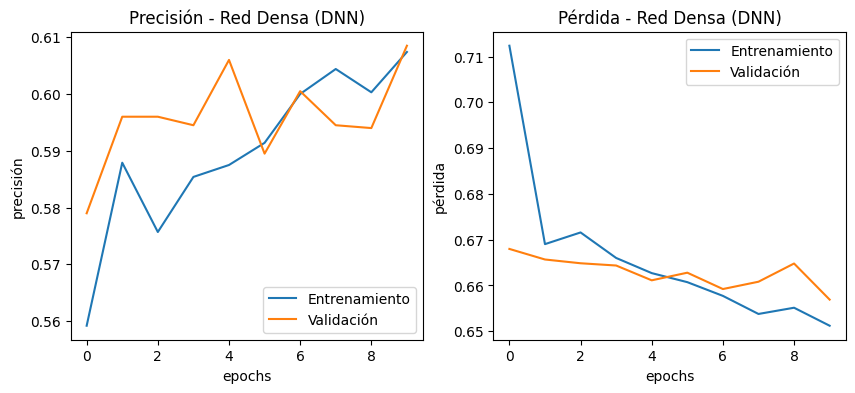

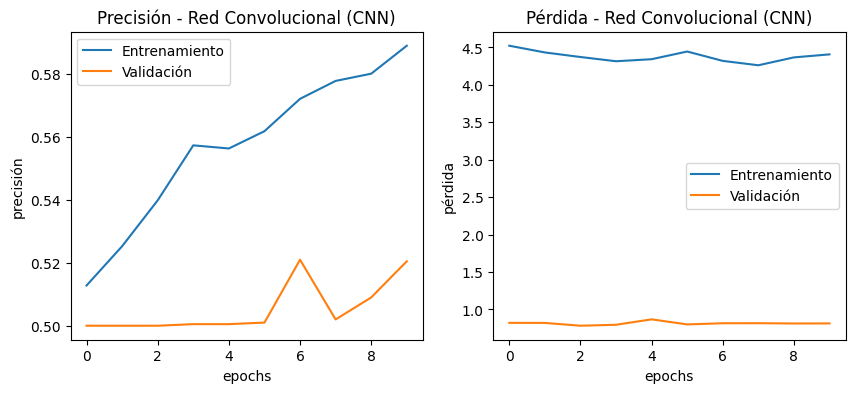

In [6]:
# graficación de precisión y pérdida de entrenamiento
def plot_history(history, title):
  plt.figure(figsize=(10,4))
  # precisión
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.title(f'Precisión - {title}')
  plt.xlabel('epochs')
  plt.ylabel('precisión')
  plt.legend()
  # pérdida
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.title(f'Pérdida - {title}')
  plt.xlabel('epochs')
  plt.ylabel('pérdida')
  plt.legend()
  # despliegue de gráfico
  plt.show()

plot_history(history_dnn, 'Red Densa (DNN)')
plot_history(history_cnn, 'Red Convolucional (CNN)')

In [7]:
#Evaluar resultado
print('\nResultado DNN')
model_dnn.evaluate(x_test, y_test)
print('\nResultado CNN')
model_cnn.evaluate(x_test, y_test)


Resultado DNN
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 0.6668

Resultado CNN
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5256 - loss: 0.8036


[0.8132707476615906, 0.5205000042915344]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


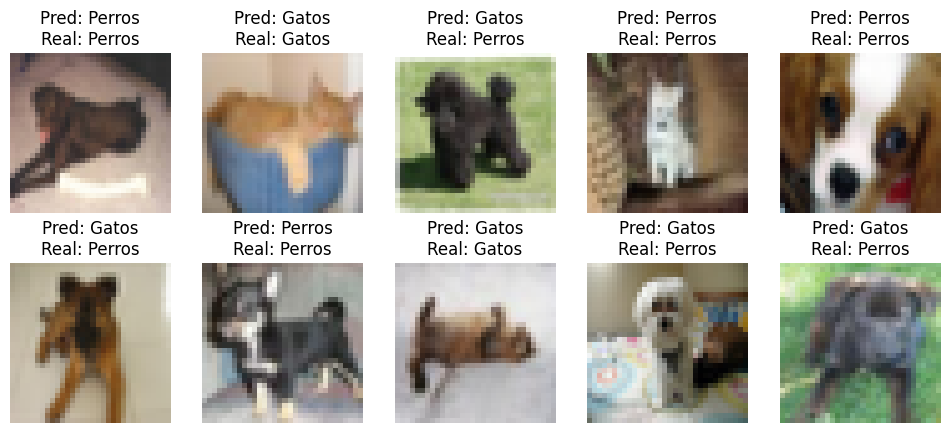

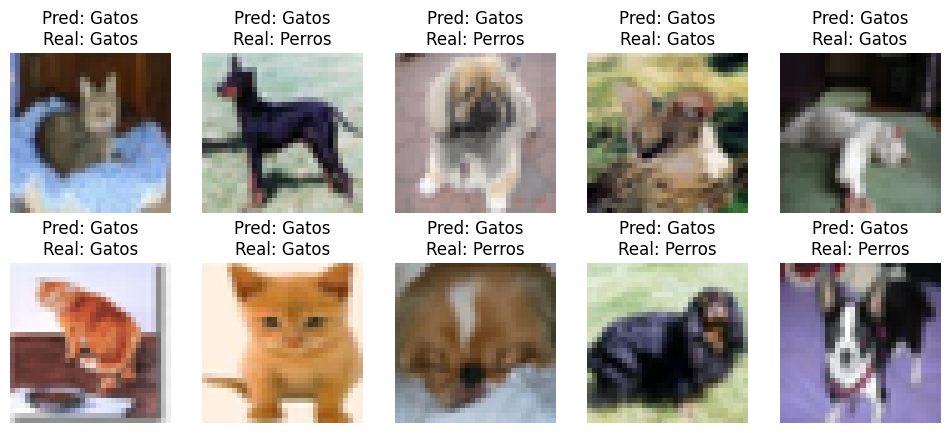

In [8]:
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")


show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

4. **Uso de nuestra red para una imgen propia**
**Instrucciones** Sube una fotografia de tu mascota y compureba si tu perro es realmetne un perro segun la IA o un gato disfrazado.

In [9]:
from google.colab import files
from tensorflow.keras.preprocessing import image

#Subir una imagen desde tu pc
uploaded = files.upload()

#Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cargado", img_path)


Saving LUCAS.jpg to LUCAS.jpg
Archivo cargado LUCAS.jpg


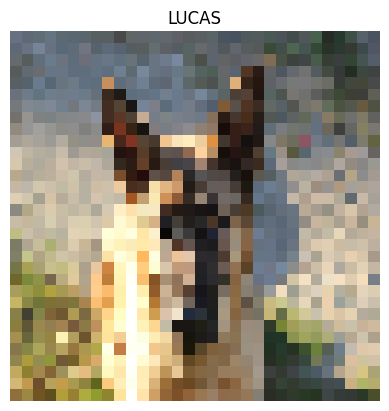

In [10]:
from pygments.formatters import img
#Cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img) /255.0
img_array = np.expand_dims(img_array, axis=0) #forma (1,32,32,3)


plt.imshow(img)
plt.title("LUCAS")
plt.axis("off")
plt.show()


In [11]:
# Hacer prediccion
pred = model_cnn.predict(img_array)[0][0]
label = f"LUCAS es un {perro.label if pred > 0.5 else gatos.label}"
print(f"Prediccion del modelo: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
Prediccion del modelo: LUCAS es un Gatos


5. **Mejora del modelo CNN oara mayor precision**
Implementaremos mas capas de nuetro modelo CNN para asegur una precision entre el 80% y 90%

In [12]:
from tensorflow.keras import layers, models

improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# compilamos CNN
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos CNN
improved_history = improved_model.fit(x_train, y_train, epochs=5, batch_size=64,
                                  validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.5878 - loss: 0.8038 - val_accuracy: 0.5300 - val_loss: 0.6818
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6447 - loss: 0.6493 - val_accuracy: 0.6690 - val_loss: 0.6483
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7007 - loss: 0.5793 - val_accuracy: 0.7080 - val_loss: 0.5799
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7415 - loss: 0.5237 - val_accuracy: 0.6340 - val_loss: 0.6623
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7628 - loss: 0.4992 - val_accuracy: 0.7845 - val_loss: 0.4817


Saving LUCAS.jpg to LUCAS (1).jpg
Archivo cargado: LUCAS (1).jpg


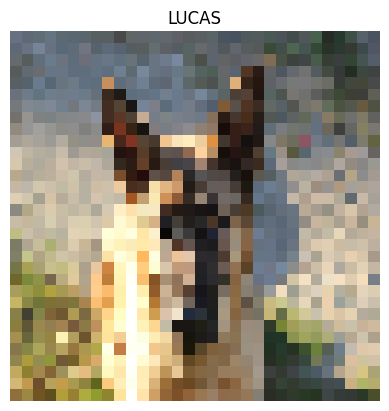

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
Predicción del modelo: LUCAS es un Perros


In [13]:
# subir imagen desde tu PC
uploaded = files.upload()

# Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cargado:", img_path)

# cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("LUCAS")
plt.axis("off")
plt.show()

# hacer predicción
pred = improved_model.predict(img_array)[0][0]
label = f"LUCAS es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predicción del modelo: {label}")